In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os

In [87]:
#Memuat File yang dibutuhkan
infile = open(("MassEval2016.dat"),'r')

In [88]:
#membuat data set
Massa = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

#membersihkan data set
Massa['Ebinding'] = pd.to_numeric(Massa['Ebinding'], errors='coerce')
Massa = Massa.dropna()
# konversi keV to MeV.
Massa['Ebinding'] /= 1000

# Group the DataFrame by nucleon number, A.
Massa = Massa.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
Massa = Massa.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])
A = Massa['A']
Z = Massa['Z']
N = Massa['N']
Element = Massa['Element']
Energies = Massa['Ebinding']

# Set up design matrix
X = np.zeros((len(A),5))
X[:,0] = 1
X[:,1] = A
X[:,2] = A**(2.0/3.0)
X[:,3] = A**(-1.0/3.0)
X[:,4] = A**(-1.0)
# Data Frame Liquid Drop Model
DesignMatrix = pd.DataFrame(X)
DesignMatrix.index = A
DesignMatrix.columns = ['1', 'A', 'A^(2/3)', 'A^(-1/3)', '1/A']
display(DesignMatrix)

,1,A,A^(2/3),A^(-1/3),1/A
A,,,,,
1,1.0,1.0,1.000000,1.000000,1.000000
2,1.0,2.0,1.587401,0.793701,0.500000
3,1.0,3.0,2.080084,0.693361,0.333333
4,1.0,4.0,2.519842,0.629961,0.250000
5,1.0,5.0,2.924018,0.584804,0.200000
6,1.0,6.0,3.301927,0.550321,0.166667
7,1.0,7.0,3.659306,0.522758,0.142857
8,1.0,8.0,4.000000,0.500000,0.125000
9,1.0,9.0,4.326749,0.480750,0.111111


In [89]:
# matrix inversion to find beta
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Energies)
# and then make the prediction
ytilde = X @ beta
print(ytilde.shape)

(267,)


In [90]:
fit = np.linalg.lstsq(X, Energies, rcond =None)[0]
ytildenp = np.dot(fit,X.T)

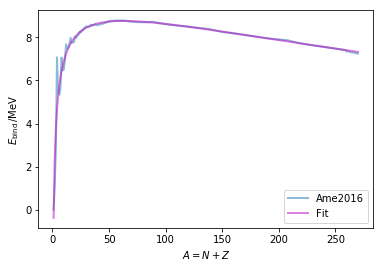

In [94]:
Massa['Eapprox']  = ytilde
# Plot
fig, ax = plt.subplots()
ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'$E_\mathrm{bind}\,/\mathrm{MeV}$')
ax.plot(Massa['A'], Massa['Ebinding'], alpha=0.5, lw=2,
            label='Ame2016')
ax.plot(Massa['A'], Massa['Eapprox'], alpha=0.5, lw=2, c='m',
            label='Fit')
ax.legend()
plt.show()

In [95]:
#R^2

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_model)) ** 2)



In [96]:
print(R2(Energies,ytilde))

0.9547578478889096


In [97]:
# Mean Squared Error
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(MSE(Energies,ytilde))

0.03787596148305239


In [98]:
def RelativeError(y_data,y_model):
    return abs((y_data-y_model)/y_data)
print(RelativeError(Energies, ytilde))

A        
1    0            inf
2    1       1.123190
3    2       0.327631
4    6       0.344172
5    9       0.044402
6    14      0.076899
7    19      0.091110
8    24      0.090653
9    29      0.033010
10   34      0.060536
11   40      0.021348
12   46      0.057821
13   52      0.012456
14   57      0.002538
15   64      0.011360
16   72      0.033230
17   78      0.006406
18   85      0.014667
19   93      0.022515
20   102     0.001432
21   110     0.013773
22   118     0.007012
23   128     0.009449
24   137     0.003110
25   146     0.006650
26   154     0.001906
27   164     0.002782
28   174     0.006990
29   183     0.003376
30   192     0.008386
               ...   
238  3089    0.000277
239  3099    0.000507
240  3109    0.000072
241  3118    0.000309
242  3127    0.000048
243  3136    0.000287
244  3144    0.000074
245  3154    0.000242
246  3162    0.000222
247  3170    0.000012
248  3177    0.000331
249  3186    0.000059
250  3194    0.000165
251  3201    0.000063
